<a href="https://colab.research.google.com/github/ajinvinodk/M.Tech-CSP_PGP/blob/main/3model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import matplotlib.pyplot as plt

In [3]:
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
trainY = trainX.reshape(60000,784)
testY = testX.reshape(10000,784)
input_1 = (trainX[:,:14,:])
input_2 = (trainX[:,14:28,:])

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
def build_model_1(width, height, depth):
	inputShape = (width,height, depth)	
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(64,activation = 'relu')
	])
	return model

In [5]:
def build_model_2(width, height, classes):
	inputShape = (width,height)
	model = Sequential([
		Flatten(input_shape = inputShape),
    Dense(392,activation = 'relu'),
		Dense(classes, activation= "softmax")
	])
	return model

In [6]:
EPOCHS = 10
BS = 32
INIT_LR = 1e-3
print("[INFO] creating model...")
model1= build_model_1(14,28,1)
model2= build_model_1(14,28,1)
model3= build_model_2(128,1,784)
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

[INFO] creating model...


In [7]:
def step(X1,X2,y):
    with tf.GradientTape(persistent=True) as tape:
      pred1 = model1(X1)
      pred2 = model2(X2)
      
      X3 = tf.keras.layers.concatenate([pred1,pred2])
      
      pred3 = model3(X3)
      #print(len(pred3))
      loss = binary_crossentropy(y, pred3)
    
    grads3 = tape.gradient(loss, model3.trainable_variables)
    #print(len(grads3))
    grads1 = tape.gradient(loss, model1.trainable_variables)
    grads2 = tape.gradient(loss, model2.trainable_variables)
    #grads1 = tape.gradient(grads3[:int(len(grads3)/2)], model1.trainable_variables)
    #grads2 = tape.gradient(grads3[int(len(grads3)/2):], model2.trainable_variables)
    
    #print("loss is = ",grads1)
    
    #grads2 = tape.gradient(grads3, model2.trainable_variables)
    opt.apply_gradients(zip(grads3, model3.trainable_variables))
    #
    
    
    opt.apply_gradients(zip(grads1, model1.trainable_variables))
    opt.apply_gradients(zip(grads2, model2.trainable_variables)) 

In [ ]:
#numUpdates = int(trainX.shape[0] / BS)
numUpdates = int(trainX.shape[0] / BS)
for epoch in range(0, EPOCHS):
	print("[INFO] starting epoch {}/{}...".format(epoch + 1, EPOCHS), end="")
	sys.stdout.flush()
	epochStart = time.time()
	for i in range(0, numUpdates):
		#print()
		print(i)
		start = i * BS
		end = start + BS
		#print("inp_1 = ",input_1[start:end])
		#print("inp_2 = ",input_2[start:end])
		step(input_1[start:end],input_2[start:end], trainY[start:end])
	epochEnd = time.time()
	elapsed = (epochEnd - epochStart) / 60.0
	print("took {:.4} minutes".format(elapsed))

In [9]:
# in order to calculate accuracy using Keras' functions we first need
# to compile the model
#model.compile(optimizer=opt, loss=categorical_crossentropy,
	#metrics=["acc"])
# now that the model is compiled we can compute the accuracy
#(loss, acc) = model.evaluate(testX, testY)
#print("[INFO] test accuracy: {:.4f}".format(acc))

In [10]:
input_test_1 = (testX[:,:14,:])
input_test_2 = (testX[:,14:28,:])

In [11]:
def step1(X1,X2,y):
    with tf.GradientTape(persistent=True) as tape:
      pred11 = model1(X1)
      pred22 = model2(X2)
      
      X3 = tf.keras.layers.concatenate([pred11,pred22])
      
      pred33 = model3(X3)
      #print(len(pred3))
      loss = binary_crossentropy(y, pred33)
      return pred33

In [12]:
out = step1(input_test_1[1:32],input_test_2[1:32], testY[1:32])

In [17]:
ppp = tf.reshape(out[5],[28,28])

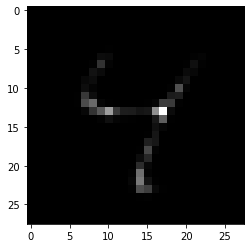

In [18]:
plt.imshow(ppp)
plt.gray()

In [15]:
ppp1 = tf.reshape(testY[6],[28,28])

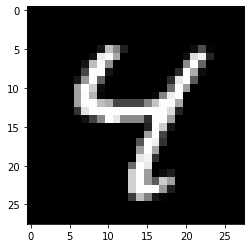

In [16]:
plt.imshow(ppp1)
plt.gray()